In [12]:
import pandas
import numpy

In [13]:
def convert_categorical_input(column_name, data_frame):
    categorical_column = data_frame[column_name]
    categorical_column_values = categorical_column.unique()
    for column_value in categorical_column_values:
        data_frame[column_name + '=' + str(column_value)] = data_frame[column_name].map(lambda x: 1 if x == column_value else 0)

In [17]:
data_frame = pandas.read_csv("train.csv", header = 0)

In [18]:
data_frame[(data_frame['Embarked'] != 'S') & (data_frame['Embarked'] != 'C') & (data_frame['Embarked'] != 'Q')]
data_frame.drop(data_frame.index[[61,829]], inplace=True)

data_frame['Age'].median()
data_frame['Age'].fillna(28, inplace=True)
data_frame['Fare'] = numpy.sqrt(data_frame['Fare'])
convert_categorical_input('Sex', data_frame)
convert_categorical_input('Embarked', data_frame)

In [19]:
processed_data = data_frame.drop(['PassengerId','Name','Sex','Ticket','Embarked', 'Cabin'], axis=1)
target_value = processed_data['Survived'].copy()
processed_data = processed_data.drop(['Survived'],axis=1)

In [22]:
## NOW WE HAVE TO SPLIT MODEL INTO TRAIN AND TEST SET AND TRAIN ON IT

In [23]:
processed_data.shape

(889, 10)

In [36]:
def cross_validation(model, X, y, k_fold=10, score_function='accuracy'):
    from sklearn.cross_validation import cross_val_score
    scores = cross_val_score(model, X, y, cv=k_fold, scoring=score_function)
    return scores

In [37]:
def plot_optimal_values(c_values, average_scores):
    import matplotlib.pyplot as plt
    %matplotlib inline

    plt.xscale("log")
    plt.plot(c_values, average_scores)
    plt.xlabel('Values of c')
    plt.ylabel('Mean Accuracy')

In [38]:
def find_optimal_logistic_regression(X,y,c_values):
    average_scores = []
    from sklearn import linear_model
    for C in c_values:
        logistic_regression = linear_model.LogisticRegression(C=C, max_iter=1000, tol=1e-4)
        scores = cross_validation(logistic_regression, X, y, k_fold=10, score_function='accuracy')
        average_scores.append(scores.mean())
    plot_optimal_values(c_values,average_scores)
    return average_scores

[0.76272982635342179, 0.79304136874361597, 0.7908197139938713, 0.78969611848825338, 0.78969611848825338]


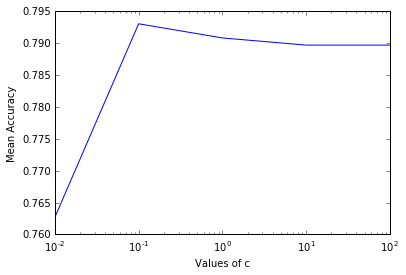

In [39]:
average_scores = find_optimal_logistic_regression(processed_data, target_value, c_values = [1e-2, 1e-1, 1, 10, 100])
print average_scores

[0.63891726251276815, 0.69964249233912157, 0.76272982635342179, 0.79079417773238003, 0.79304136874361597, 0.7908197139938713]


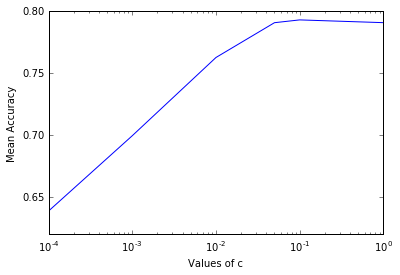

In [40]:
average_scores = find_optimal_logistic_regression(processed_data, target_value, c_values = [1e-4, 1e-3, 1e-2, 0.5e-1, 1e-1, 1])
print average_scores

In [41]:
print 'From above model best logistic regression is using 1e-1'

From above model best logistic regression is using 1e-1


In [43]:
from sklearn import linear_model
logistic_regression = linear_model.LogisticRegression(C=1e-1, max_iter=1000, tol=1e-4)
logistic_regression.fit(processed_data, target_value)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
def find_optimal_SVM(X,y,c_values):
    average_scores = []
    from sklearn import svm
    for C in c_values:
        SVM = svm.SVC(C=C, tol=1e-4, max_iter=-1)
        scores = cross_validation(SVM, X, y, k_fold=10, score_function='accuracy')
        average_scores.append(scores.mean())
    plot_optimal_values(c_values,average_scores)
    return average_scores

[0.61754341164453519, 0.66255107252298251, 0.80209397344228806, 0.79310520939734419, 0.77055669050051068]


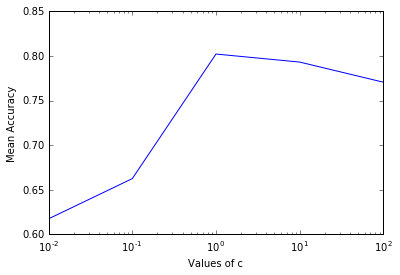

In [46]:
average_scores = find_optimal_SVM(processed_data, target_value, c_values = [1e-2, 1e-1, 1, 10, 100])
print average_scores

[0.66255107252298251, 0.61754341164453519, 0.74020684371807977, 0.79645045965270689, 0.80209397344228806]


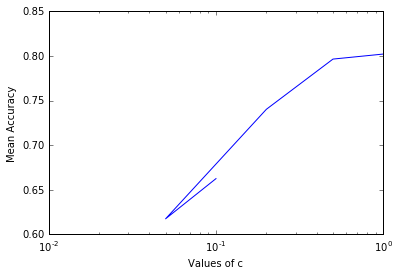

In [47]:
average_scores = find_optimal_SVM(processed_data, target_value, c_values = [1e-1, 0.5e-1, 0.2, 0.5, 1])
print average_scores

[0.80209397344228806, 0.80209397344228806, 0.79984678243105201, 0.80209397344228806, 0.79195607763023479]


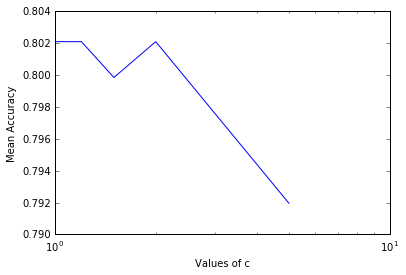

In [48]:
average_scores = find_optimal_SVM(processed_data, target_value, c_values = [1, 1.2, 1.5, 2, 5])
print average_scores

In [50]:
print 'The best value of C is 1'
from sklearn import svm
SVM = svm.SVC(C=1, tol=1e-4, max_iter=-1)
SVM.fit(processed_data, target_value)

The best value of C is 1


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.0001, verbose=False)

In [52]:
test_data = pandas.read_csv("test.csv", header = 0)

convert_categorical_input('Sex', test_data)
convert_categorical_input('Embarked', test_data)

processed_test_data = test_data.drop(['PassengerId','Name','Sex','Ticket','Embarked', 'Cabin'], axis=1)

processed_test_data['Fare'] = numpy.sqrt(processed_test_data['Fare'])

processed_test_data['Age'].fillna(28, inplace=True)

processed_test_data['Fare'].fillna(2.8, inplace=True)

In [54]:
def output_data(test_data, predictions, filename):
    output = pandas.DataFrame({'PassengerId' : test_data['PassengerId'],
                               'Survived'    : predictions})
    output.to_csv(filename,index=False)

In [55]:
predictions = logistic_regression.predict(processed_test_data)
output_data(test_data, predictions, "best_logistic_regression.csv")

In [56]:
predictions = SVM.predict(processed_test_data)
output_data(test_data, predictions, "best_SVM.csv")